In [2]:
import numpy as np
import matplotlib.pyplot as plt

## General function

In [3]:
def calcDeflectionFromLineLoad_LEFT_TeChange(Te_1=15000, Te_2=25000, x_Te=0, x_load=-20000, q=0, rho_m = 3300, rho_s = 2600, x_min=-500000, x_max=500000, dx=10):
    # Te_1 = 15000
    # Te_2 = 25000
    E = 65E9 # Young's Modulus
    nu = 0.25

    g=9.81

    D_1 = E * Te_1**3 /(12*(1-nu**2))
    D_2 = E * Te_2**3 /(12*(1-nu**2))

    a_1 = (4*D_1/((rho_m-rho_s)*g) )**0.25
    a_2 = (4*D_2/((rho_m-rho_s)*g) )**0.25

    # Locate load
    y = x_load
    
    # Create empty matrix, M
    M = np.zeros( (8,8) )
    
    # w_1(x=y) = w_2(x=y)
    # A_1 - B_1 - B_3 = 0
    M[0,0] = 1
    M[0,2] = -1
    M[0,4] = -1

    # w_2(x=0) = w_3(x=0)
    # B_1 \exp{ \left( \frac{y}{\alpha_1} \right) } \cos \left( \frac{-y}{\alpha_1}\right) + B_2 \exp{ \left( \frac{y}{\alpha_1} \right) }  \sin \left(\frac{-y}{\alpha_1}\right) + \exp{ \frac{-y}{\alpha_1}}   B_3 \cos \left( \frac{-y}{\alpha_1}\right) + B_4 \exp{ \frac{-y}{\alpha_1}}  \sin \left(\frac{-y}{\alpha_1}\right) -  C_1 =0
    M[1,2] = np.exp(y / a_1) * np.cos(-y/a_1)
    M[1,3] = np.exp(y / a_1) * np.sin(-y/a_1)
    M[1,4] = np.exp(-y / a_1) * np.cos(-y/a_1)
    M[1,5] = np.exp(-y / a_1) * np.sin(-y/a_1)
    M[1,6] = -1
    
    # \dot{w}_1(x=y) = \dot{w}_2(x=y)
    # A_1+A_2+B_1-B_2-B_3-B_4=0
    M[2,0] = 1
    M[2,1] = 1
    M[2,2] = 1
    M[2,3] = -1
    M[2,4] = -1
    M[2,5] = -1
    
    M[3,2] = -np.exp(y / a_1) *( np.cos(-y/a_1)+ np.sin(-y/a_1) )
    M[3,3] = np.exp(y / a_1) *( np.cos(-y/a_1)- np.sin(-y/a_1) )
    M[3,4] = np.exp(-y / a_1) *( np.cos(-y/a_1)- np.sin(-y/a_1) )
    M[3,5] = np.exp(-y / a_1) *( np.cos(-y/a_1)+ np.sin(-y/a_1) )
    M[3,6] = a_1/a_2
    M[3,7] = -a_1/a_2
    
    M[4,1] = 1
    M[4,3] = 1
    M[4,5] = -1
    
    M[5,2] = np.exp(y / a_1)*np.sin(-y / a_1)
    M[5,3] = -np.exp(y / a_1)*np.cos(-y / a_1)
    M[5,4] = -np.exp(-y / a_1)*np.sin(-y / a_1)
    M[5,5] = np.exp(-y / a_1)*np.cos(-y / a_1)
    M[5,7] = D_2*a_1**2/(D_1*a_2**2)

    M[6,2] = np.exp(y / a_1)*(np.cos(-y / a_1) - np.sin(-y / a_1))
    M[6,3] = np.exp(y / a_1)*(np.cos(-y / a_1) + np.sin(-y / a_1))
    M[6,4] = -np.exp(-y / a_1)*(np.cos(-y / a_1) + np.sin(-y / a_1))
    M[6,5] = np.exp(-y / a_1)*(np.cos(-y / a_1) - np.sin(-y / a_1))
    M[6,6] = -D_2*a_1**3/(D_1*a_2**3)
    M[6,7] = -D_2*a_1**3/(D_1*a_2**3)

    M[7,0] = -1
    M[7,1] = 1
    M[7,2] = -1
    M[7,3] = -1
    M[7,4] = 1
    M[7,5] = -1

    # Apply line load
    h=3000
    V_0 = h*g*(rho_s-rho_m)

    c = np.zeros(8)
    c[7] = -V_0*a_1**3/(2*D_1)

    # Solve matrix equation
    u = np.linalg.solve(M,c)

    x_1 = np.arange(x_min-x_Te,y,dx)
    x_2 = np.arange(y,0,dx)
    x_3 = np.arange(0,x_max-x_Te,dx)

    A1 = u[0]
    A2 = u[1]
    B1 = u[2]
    B2 = u[3]
    B3 = u[4]
    B4 = u[5]
    C1 = u[6]
    C2 = u[7]

    w_1 = np.exp((x_1-y) / a_1)*(A1*np.cos((x_1-y)/a_1)+A2*np.sin((x_1-y)/a_1))

    w_2 = (np.exp((y-x_2) / a_1)*(B1*np.cos((x_2-y)/a_1)+B2*np.sin((x_2-y)/a_1)) +
           np.exp((x_2-y) / a_1)*(B3*np.cos((x_2-y)/a_1)+B4*np.sin((x_2-y)/a_1)))

    w_3 = np.exp((-x_3) / a_2)*(C1*np.cos((x_3)/a_2)+C2*np.sin((x_3)/a_2))

    x = np.concatenate( [x_1, x_2, x_3] )
    w = np.concatenate( [w_1, w_2, w_3] )
    
    return x, w


In [96]:
def calcDeflectionFromLineLoad_LEFT_TeChange_2(Te_1=15000, Te_2=25000, x_Te=0, x_load=-20000, q=0, rho_m = 3300, rho_s = 2600, x=np.arange(-10,10,1), dx=10):
    # Te_1 = 15000
    # Te_2 = 25000
    E = 65E9 # Young's Modulus
    nu = 0.25

    g=9.81

    D_1 = E * Te_1**3 /(12*(1-nu**2))
    D_2 = E * Te_2**3 /(12*(1-nu**2))

    a_1 = (4*D_1/((rho_m-rho_s)*g) )**0.25
    a_2 = (4*D_2/((rho_m-rho_s)*g) )**0.25

    # Locate load
    y = x_load
    
    # Create empty matrix, M
    M = np.zeros( (8,8) )
    
    # w_1(x=y) = w_2(x=y)
    # A_1 - B_1 - B_3 = 0
    M[0,0] = 1
    M[0,2] = -1
    M[0,4] = -1

    # w_2(x=0) = w_3(x=0)
    # B_1 \exp{ \left( \frac{y}{\alpha_1} \right) } \cos \left( \frac{-y}{\alpha_1}\right) + B_2 \exp{ \left( \frac{y}{\alpha_1} \right) }  \sin \left(\frac{-y}{\alpha_1}\right) + \exp{ \frac{-y}{\alpha_1}}   B_3 \cos \left( \frac{-y}{\alpha_1}\right) + B_4 \exp{ \frac{-y}{\alpha_1}}  \sin \left(\frac{-y}{\alpha_1}\right) -  C_1 =0
    M[1,2] = np.exp(y / a_1) * np.cos(-y/a_1)
    M[1,3] = np.exp(y / a_1) * np.sin(-y/a_1)
    M[1,4] = np.exp(-y / a_1) * np.cos(-y/a_1)
    M[1,5] = np.exp(-y / a_1) * np.sin(-y/a_1)
    M[1,6] = -1
    
    # \dot{w}_1(x=y) = \dot{w}_2(x=y)
    # A_1+A_2+B_1-B_2-B_3-B_4=0
    M[2,0] = 1
    M[2,1] = 1
    M[2,2] = 1
    M[2,3] = -1
    M[2,4] = -1
    M[2,5] = -1
    
    M[3,2] = -np.exp(y / a_1) *( np.cos(-y/a_1)+ np.sin(-y/a_1) )
    M[3,3] = np.exp(y / a_1) *( np.cos(-y/a_1)- np.sin(-y/a_1) )
    M[3,4] = np.exp(-y / a_1) *( np.cos(-y/a_1)- np.sin(-y/a_1) )
    M[3,5] = np.exp(-y / a_1) *( np.cos(-y/a_1)+ np.sin(-y/a_1) )
    M[3,6] = a_1/a_2
    M[3,7] = -a_1/a_2
    
    M[4,1] = 1
    M[4,3] = 1
    M[4,5] = -1
    
    M[5,2] = np.exp(y / a_1)*np.sin(-y / a_1)
    M[5,3] = -np.exp(y / a_1)*np.cos(-y / a_1)
    M[5,4] = -np.exp(-y / a_1)*np.sin(-y / a_1)
    M[5,5] = np.exp(-y / a_1)*np.cos(-y / a_1)
    M[5,7] = D_2*a_1**2/(D_1*a_2**2)

    M[6,2] = np.exp(y / a_1)*(np.cos(-y / a_1) - np.sin(-y / a_1))
    M[6,3] = np.exp(y / a_1)*(np.cos(-y / a_1) + np.sin(-y / a_1))
    M[6,4] = -np.exp(-y / a_1)*(np.cos(-y / a_1) + np.sin(-y / a_1))
    M[6,5] = np.exp(-y / a_1)*(np.cos(-y / a_1) - np.sin(-y / a_1))
    M[6,6] = -D_2*a_1**3/(D_1*a_2**3)
    M[6,7] = -D_2*a_1**3/(D_1*a_2**3)

    M[7,0] = -1
    M[7,1] = 1
    M[7,2] = -1
    M[7,3] = -1
    M[7,4] = 1
    M[7,5] = -1

    # Apply line load
    h=3000
    V_0 = h*g*(rho_s-rho_m)*dx

    c = np.zeros(8)
    c[7] = -V_0*a_1**3/(2*D_1)

    # Solve matrix equation
    u = np.linalg.solve(M,c)
    
    n_1 = x <= y
    x_1 = x[n_1]
    n_2 = (x > y) * (x<0)
    x_2 = x[n_2]
    n_3 = x >= 0
    x_3 = x[n_3]

    A1 = u[0]
    A2 = u[1]
    B1 = u[2]
    B2 = u[3]
    B3 = u[4]
    B4 = u[5]
    C1 = u[6]
    C2 = u[7]

    w_1 = np.exp((x_1-y) / a_1)*(A1*np.cos((x_1-y)/a_1)+A2*np.sin((x_1-y)/a_1))

    w_2 = (np.exp((y-x_2) / a_1)*(B1*np.cos((x_2-y)/a_1)+B2*np.sin((x_2-y)/a_1)) +
           np.exp((x_2-y) / a_1)*(B3*np.cos((x_2-y)/a_1)+B4*np.sin((x_2-y)/a_1)))

    w_3 = np.exp((-x_3) / a_2)*(C1*np.cos((x_3)/a_2)+C2*np.sin((x_3)/a_2))

    x_conc = np.concatenate( [x_1, x_2, x_3] )
    w = np.concatenate( [w_1, w_2, w_3] )
    
    return x, w, x_conc



## Single line load - compare analytic and Garfunkel

In [40]:
x_load = -15000
Te_1 = 15000
Te_2 = 15000

In [41]:
x, w = calcDeflectionFromLineLoad_LEFT_TeChange(Te_1=Te_1, Te_2=Te_2, x_Te=0, x_load=x_load, q=0, rho_m = 3300, rho_s = 2600)

In [42]:
rho_m = 3300
rho_s = 2600

E = 65E9 # Young's Modulus
nu = 0.25

g=9.81

D_1 = E * Te_1**3 /(12*(1-nu**2))
#D_2 = E * Te_2**3 /(12*(1-nu**2))

a_1 = (4*D_1/((rho_m-rho_s)*g) )**0.25
#a_2 = (4*D_2/((rho_m-rho_s)*g) )**0.25

y=x_load

h=3000
V_0 = h*g*(rho_s-rho_m)
q=V_0

w_analytic = q * a_1**3/(8*D_1) * np.exp( -np.abs(x-y)/a_1) * (np.cos(np.abs(x-y)/a_1)+np.sin(np.abs(x-y)/a_1))

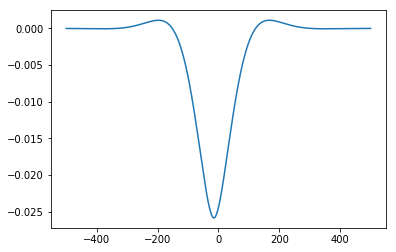

In [43]:
plt.plot(x/1000,w_analytic)

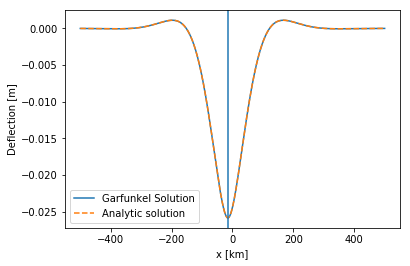

In [44]:
plt.plot(x/1000,w, label="Garfunkel Solution")

plt.plot(x/1000,w_analytic, '--', label="Analytic solution")

plt.axvline(x_load/1000)

plt.xlabel("x [km]")
plt.ylabel("Deflection [m]")
plt.legend()

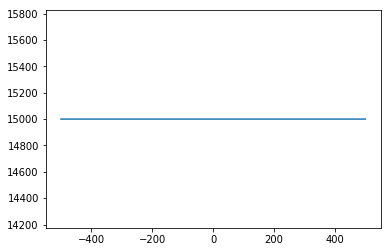

In [45]:
E = 65E9
nu = 0.25

dx=10

Te = np.ones_like(x)
Te = Te * Te_1
Te[ x>0 ] = Te_2
plt.plot(x/1000, Te)

D = E*Te**3 / (12*(1-nu**2))

dD_dx = np.zeros_like(D)
d2D_dx2 = np.zeros_like(D)

w=w

d2w_dx2 = np.zeros_like(D)
d3w_dx3 = np.zeros_like(D)
d4w_dx4 = np.zeros_like(D)

dD_dx[1:-1] =  (D[2:] - D[:-2]) / dx
d2D_dx2[2:-2] =  ( -D[4:] + 16*D[3:-1] - 30* D[2:-2] + 16*D[1:-3] - D[:-4] ) / (12 * dx**2)

d2w_dx2[2:-2] =  ( -w[4:] + 16*w[3:-1] - 30* w[2:-2] + 16*w[1:-3] - w[:-4] ) / (12 * dx**2)
d3w_dx3[2:-2] =  ( w[4:] -2*w[3:-1]  + 2*w[1:-3] - w[:-4] ) / (2 * dx**3)
d4w_dx4[2:-2] =  ( w[4:] -4*w[3:-1] +6* w[2:-2] -4*w[1:-3] + w[:-4] ) / (dx**4)

Text(0.5,0,'x [nodes]')

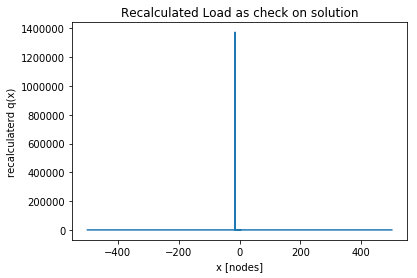

In [46]:
delRho = rho_m - rho_s
g = 9.81

q = D * d4w_dx4 + 2 * dD_dx * d3w_dx3 + d2D_dx2 * d2w_dx2 + delRho * g * w

h=3000
V_0 = h*(rho_m-rho_s)*load_x

plt.plot(x/1000, -q)
#plt.plot(x/1000, V_0)
#plt.axvline(x=Te_change_node, c='r', linestyle='--', linewidth=0.5)
plt.title("Recalculated Load as check on solution")
plt.ylabel("recalculaterd q(x)")
plt.xlabel("x [nodes]")



## Distributed Load

-280000.0 120000.0


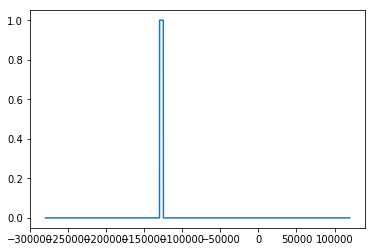

In [63]:
L = 200000 * 2

x_min = -0.7*L
x_max = 0.3*L

print( x_min, x_max)

dx = 1.

Te_1 = 15000
Te_2 = 25000

xLoad_min = 150000.
xLoad_width = 5000.
xLoad_max = xLoad_min + xLoad_width
nLoad_min = int( xLoad_min // dx )
nLoad_max = int( xLoad_max // dx )

xLoad_min = 150000

x = np.arange(x_min, x_max, dx)

load_x = np.zeros_like( x )
load_x[nLoad_min:nLoad_max] = 1.

plt.plot(x, load_x)

In [64]:
w_total = np.zeros_like(load_x, dtype='float64')

for n, load in enumerate(load_x):
    if (load>0):
        x_load = x[n]
        x, w_inc = calcDeflectionFromLineLoad_LEFT_TeChange(Te_1=Te_1, Te_2=Te_2, x_Te=0, x_load=x_load, q=0, rho_m = 3300, rho_s = 2600, x_min=x_min, x_max=x_max, dx=dx)
        w_total += w_inc

(-20, 300)

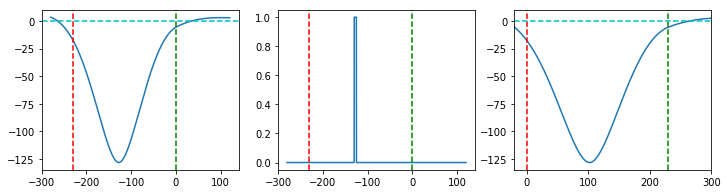

In [65]:
plt.figure(figsize=(12,10))

plt.subplot(3,3,1)
plt.plot((x)/1000  , w_total)
plt.axvline(0, c='g', linestyle='--')
plt.axhline(0, c='c', linestyle='--')
plt.axvline(x[50000]/1000, c='r', linestyle='--')

plt.subplot(3,3,2)
plt.plot(x/1000, load_x)
plt.axvline(0, c='g', linestyle='--')
plt.axvline(x[50000]/1000, c='r', linestyle='--')

plt.subplot(3,3,3)
plt.plot( (x-x[50000])/1000  , w_total )
plt.axvline(0, c='r', linestyle='--')
plt.axvline(-x[50000]/1000, c='g', linestyle='--')
plt.axhline(0, c='c', linestyle='--')
plt.xlim(-20,300)


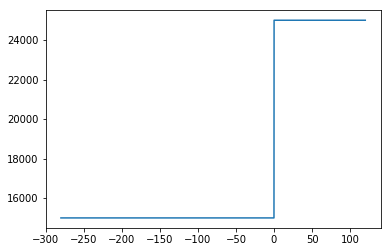

In [66]:
E = 65E9
nu = 0.25

Te = np.ones_like(x)
Te = Te * Te_1
Te[ x>0 ] = Te_2
plt.plot(x/1000, Te)

D = E*Te**3 / (12*(1-nu**2))

dD_dx = np.zeros_like(D)
d2D_dx2 = np.zeros_like(D)

w=w_total

d2w_dx2 = np.zeros_like(D)
d3w_dx3 = np.zeros_like(D)
d4w_dx4 = np.zeros_like(D)

dD_dx[1:-1] =  (D[2:] - D[:-2]) / dx
d2D_dx2[2:-2] =  ( -D[4:] + 16*D[3:-1] - 30* D[2:-2] + 16*D[1:-3] - D[:-4] ) / (12 * dx**2)

d2w_dx2[2:-2] =  ( -w[4:] + 16*w[3:-1] - 30* w[2:-2] + 16*w[1:-3] - w[:-4] ) / (12 * dx**2)
d3w_dx3[2:-2] =  ( w[4:] -2*w[3:-1]  + 2*w[1:-3] - w[:-4] ) / (2 * dx**3)
d4w_dx4[2:-2] =  ( w[4:] -4*w[3:-1] +6* w[2:-2] -4*w[1:-3] + w[:-4] ) / (dx**4)

In [67]:
Te_2

25000

Text(0.5,0,'x [nodes]')

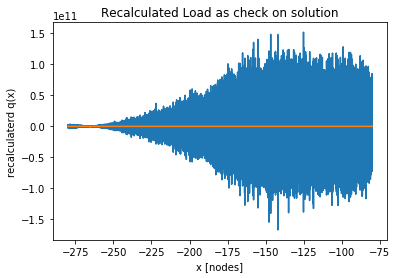

In [82]:
delRho = rho_m - rho_s
g = 9.81

q = D * d4w_dx4 + 2 * dD_dx * d3w_dx3 + d2D_dx2 * d2w_dx2 + delRho * g * w

h=3000
V_0 = h*(rho_m-rho_s)*load_x

plt.plot(x[:200000]/1000, -q[:200000])
plt.plot(x[:200000]/1000, V_0[:200000])
#plt.axvline(x=Te_change_node, c='r', linestyle='--', linewidth=0.5)
plt.title("Recalculated Load as check on solution")
plt.ylabel("recalculaterd q(x)")
plt.xlabel("x [nodes]")



(-300, -10)

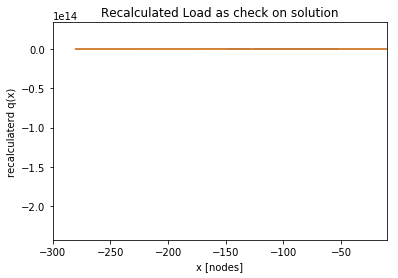

In [73]:
delRho = rho_m - rho_s
g = 9.81

q = D * d4w_dx4 + 2 * dD_dx * d3w_dx3 + d2D_dx2 * d2w_dx2 + delRho * g * w

h=3000
V_0 = h*(rho_m-rho_s)*load_x

plt.plot(x/1000, -q)
plt.plot(x/1000, V_0)
#plt.axvline(x=Te_change_node, c='r', linestyle='--', linewidth=0.5)
plt.title("Recalculated Load as check on solution")
plt.ylabel("recalculaterd q(x)")
plt.xlabel("x [nodes]")
plt.xlim=(-650,400)



/Users/mnaylor/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


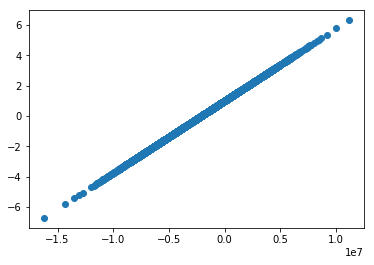

In [56]:
plt.scatter(q, (V_0+q)/V_0)

128096766.3892607


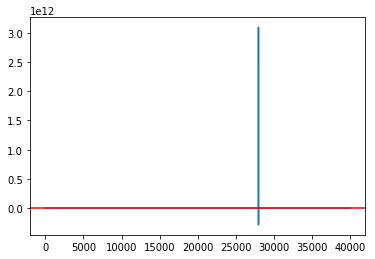

In [57]:
plt.plot((V_0+q))
tmp = np.mean(V_0+q) 
print(tmp)
plt.axhline(tmp, c='r')

## A first plot for the paper

-640000.0 159999.99999999997


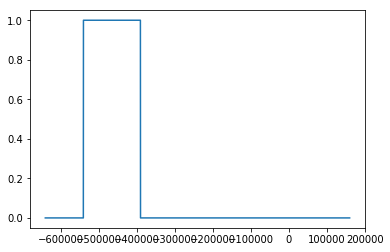

In [120]:
L = 400000 * 2

dx = 10.

locationOfTeChange = 0.8
x_min = -locationOfTeChange*L
x_max = (1-locationOfTeChange)*L
x = np.arange(x_min, x_max, dx)

print( x_min, x_max)

Te_1 = 15000
Te_2 = 20000


xLoad_width = 150000.
xLoad_min = 100000.
xLoad_max = xLoad_min + xLoad_width
nLoad_min = int( xLoad_min // dx )
nLoad_max = int( xLoad_max // dx )

#xLoad_min = 150000

load_x = np.zeros_like( x )
load_x[nLoad_min:nLoad_max] = 1.

plt.plot(x, load_x)

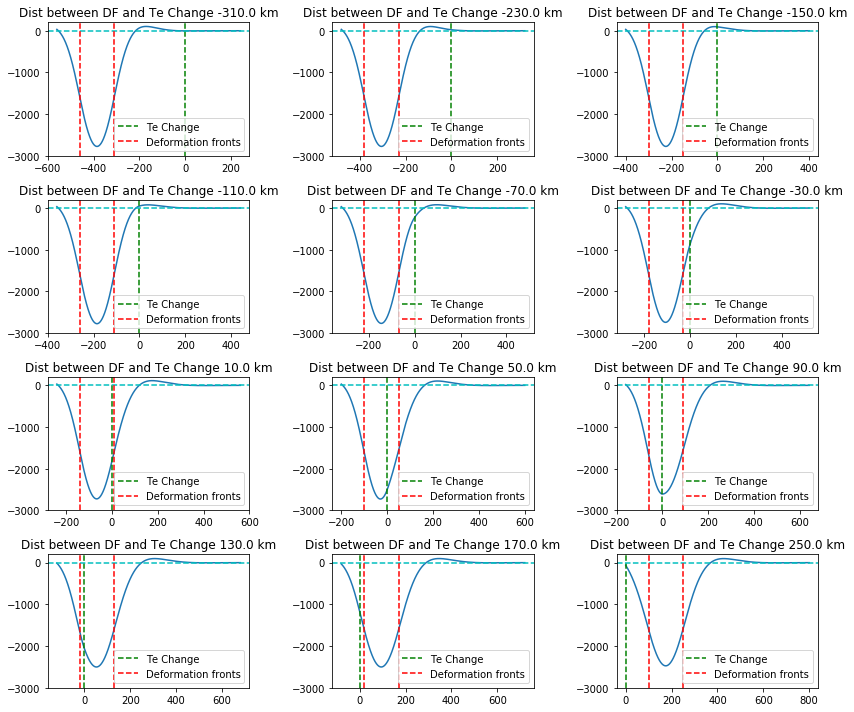

In [121]:
plt.figure(figsize=(12,10))

listOfTeChangeLocations = np.array( [ 0.7,0.6,0.5, 0.45, 0.4, 0.35,0.3, 0.25,0.2, 0.15, 0.1, 0.0] )
x_FB_DF = np.empty_like( listOfTeChangeLocations )
x_delTe_DF = np.empty_like( listOfTeChangeLocations )
z_FB = np.empty_like( listOfTeChangeLocations )
z_DF = np.empty_like( listOfTeChangeLocations )

for i, TeChangeLocation in enumerate(listOfTeChangeLocations):
    x_min = -TeChangeLocation*L
    x_max = (1-TeChangeLocation)*L
    x_init = np.arange(x_min, x_max, dx)
    
    w_total = np.zeros_like(x_init)
    
    # Iterate over all applied loads
    for n, load in enumerate(load_x):
        if (load>0):
            x_load = x_init[n]
            
            # If the load is to the left of the Te Change
            if(x_load < 0):
                x_tmp, w_inc, x_conc = calcDeflectionFromLineLoad_LEFT_TeChange_2(Te_1=Te_1, Te_2=Te_2, x_Te=0, x_load=x_load, q=0, rho_m = 3300, rho_s = 2600, x=x_init)
                w_total += w_inc
            # If the load is to the right, reverse the terms to perform the calculation and flip the result
            elif(x_load > 0):
                x_tmp, w_inc, x_conc = calcDeflectionFromLineLoad_LEFT_TeChange_2(Te_1=Te_2, Te_2=Te_1, x_Te=0, x_load=-x_load, q=0, rho_m = 3300, rho_s = 2600, x=np.flip(-x_init, axis=0))
                w_total += np.flip( w_inc, axis=0)
    
    x = x_init
    
    ## Locate the current position of the forebulge
    n_FB = nLoad_max + np.argmax( w_total[nLoad_max:])
    n_DF = nLoad_max
    
    x_FB_DF[i] = x[n_FB] - x[n_DF]
    x_delTe_DF[i] = 0 - x[n_DF]
    
    z_FB[i] = w_total[n_FB]
    z_DF[i] = w_total[n_DF]
    
    plt.subplot(4,3, (i+1))

    plt.plot((x)/1000  , w_total)
    plt.axvline(0, c='g', linestyle='--', label="Te Change")
    plt.axhline(0, c='c', linestyle='--')
    plt.axvline((x[0]+xLoad_max)/1000, c='r', linestyle='--', label="Deformation fronts")
    plt.axvline((x[0]+xLoad_min)/1000, c='r', linestyle='--')
    plt.title("Dist between DF and Te Change "+str((x[0]+xLoad_max)/1000)+" km" )
    plt.ylim(-3000,200)
    plt.legend()

plt.tight_layout()

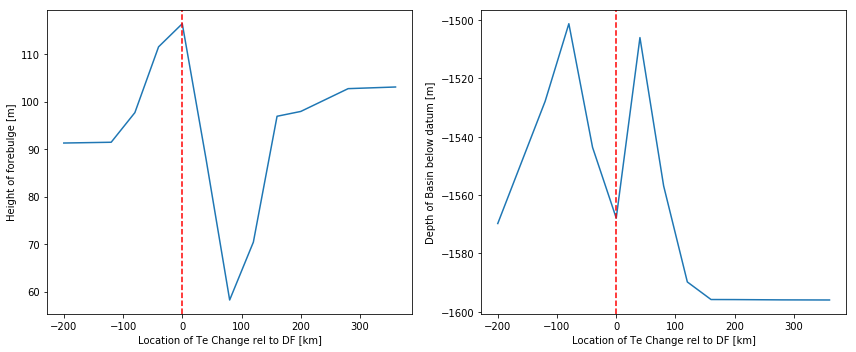

In [118]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(x_delTe_DF/1000, z_FB)
plt.xlabel("Location of Te Change rel to DF [km]")
plt.ylabel("Height of forebulge [m]")
plt.axvline(0, linestyle='--', c='r')

plt.subplot(1,2,2)
plt.plot(x_delTe_DF/1000, z_DF)
plt.xlabel("Location of Te Change rel to DF [km]")
plt.ylabel("Depth of Basin below datum [m]")
plt.axvline(0, linestyle='--', c='r')

plt.tight_layout()

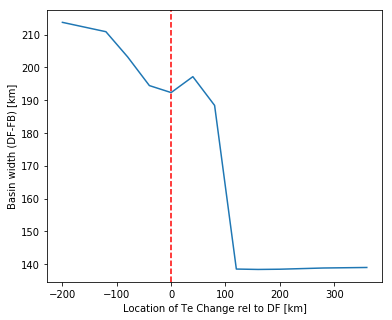

In [119]:
plt.figure(figsize=(6,5))
plt.plot(x_delTe_DF/1000, x_FB_DF/1000)
plt.xlabel("Location of Te Change rel to DF [km]")
plt.ylabel("Basin width (DF-FB) [km]")
plt.axvline(0, linestyle='--', c='r')